<a href="https://colab.research.google.com/github/ShraddhaP123/LGMVIP-DataScience/blob/main/STOCK_MARKET_PREDICTION_AND_FORECASTING_USING_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION AND FORECASTING USING LSTM**


**AUTHOR - SHRADDHA PATTANSHETTI**

**LETSGROWMORE BEGINEER LEVEL TASK 2**

**Import Libraries**

In [51]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

**Loading dataset**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

**Remove Null values**

In [4]:
data = data.dropna()

In [6]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [7]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [8]:
data_close = data['Close']

In [9]:
data_close.shape

(2035,)

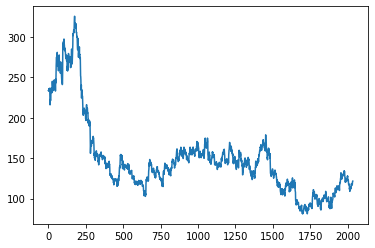

In [10]:
plt.plot(data_close)

**Since LSTM are sensitive to the scale of the data, so we apply MinMax Scaler to transform our values between 0 and 1**

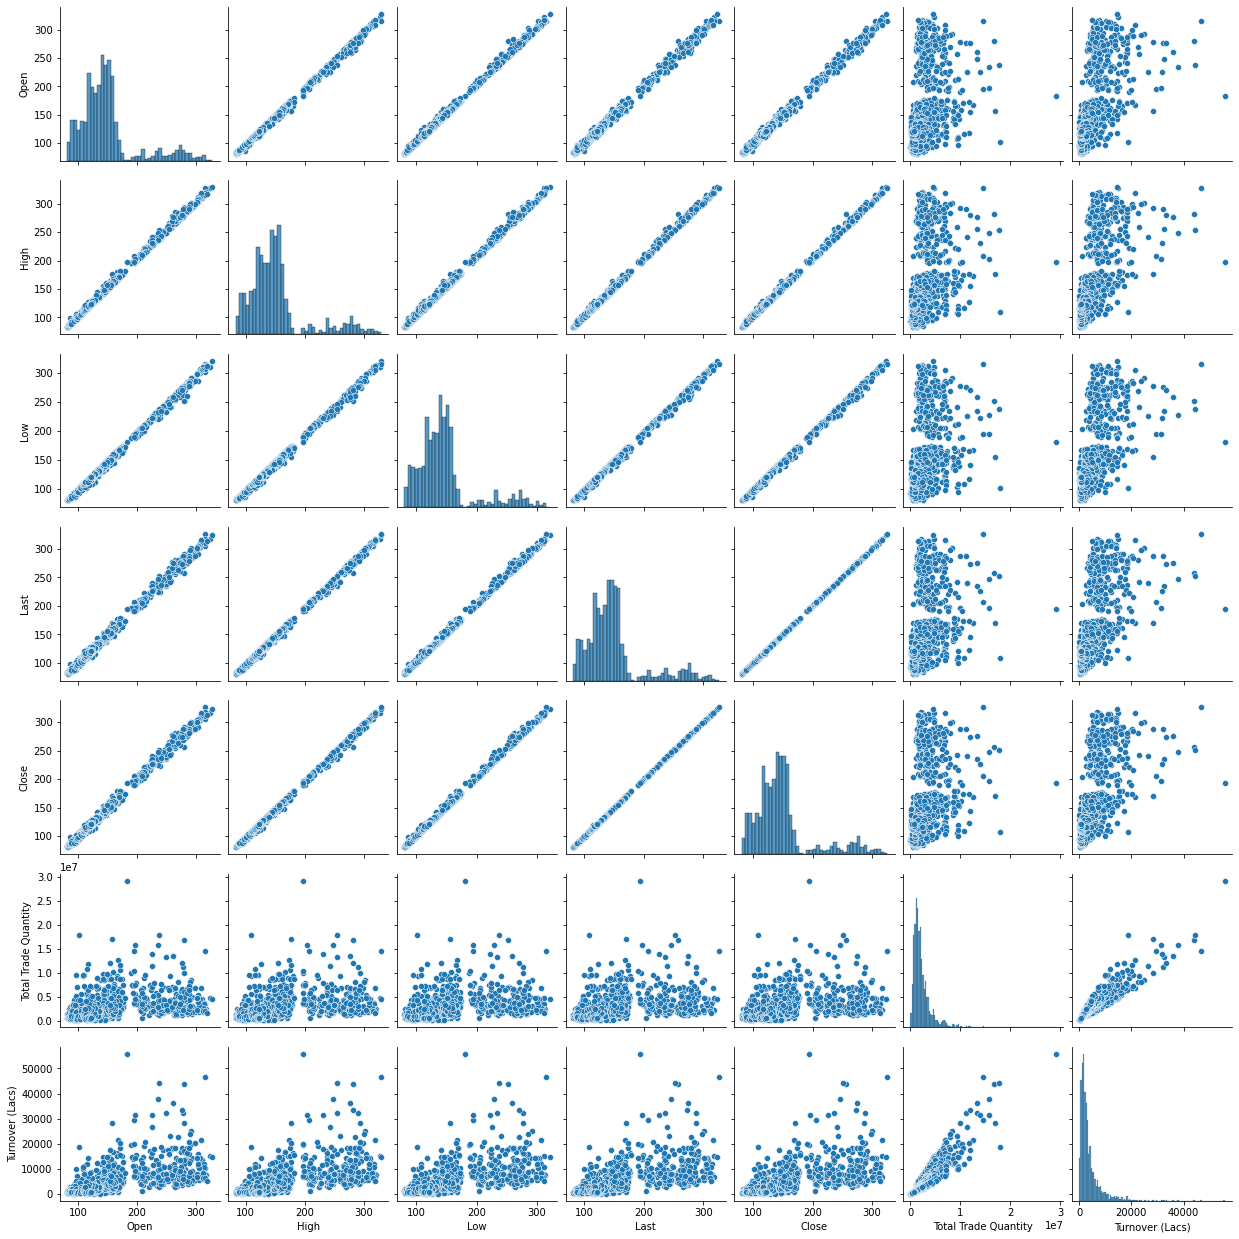

In [53]:
sns.pairplot(data)
plt.show()

In [13]:
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [14]:
data_close.shape

(2035, 1)

In [15]:
data_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Splitting dataset into training and testing**

In [16]:
training_size = int(len(data_close) * 0.75)
test_size = len(data_close) - training_size
train_data, test_data = data_close[0:training_size,:], data_close[training_size:len(data_close),:1]

In [54]:
print('Size of training and testing : ',training_size,test_size)

Size of training and testing :  1526 509


**Convert an array of values into a dataset matrix**

In [17]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

**Reshape into X=t,t+1,t+2,t+3 and Y=t+4**

In [18]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [56]:
print('shape of X_train : ',x_train.shape)
print('shape of y_train : ',y_train.shape)

shape of X_train :  (1425, 100, 1)
shape of y_train :  (1425,)


In [57]:
print('shape of X_train : ',x_test.shape)
print('shape of y_train : ',y_test.shape)

shape of X_train :  (408, 100, 1)
shape of y_train :  (408,)


**Reshape the input to be [samples, time steps, features] which is the requirement of LSTM**

In [19]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Creating LSTM Model**

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 15s 351ms/step - loss: 0.0234 - val_loss: 0.0092
Epoch 2/100
23/23 [==============================] - 7s 320ms/step - loss: 0.0026 - val_loss: 7.7846e-04
Epoch 3/100
23/23 [==============================] - 7s 322ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 7s 319ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 5/100
23/23 [==============================] - 7s 321ms/step - loss: 0.0012 - val_loss: 9.2760e-04
Epoch 6/100
23/23 [==============================] - 7s 322ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
23/23 [==============================] - 7s 322ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
23/23 [==============================] - 7s 319ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 7s 319ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/100
23/23 [==============================] - 7s 323ms/step - loss: 0.0010

**Predicting and checking performance metrics**

In [23]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

**Transform to original form**

In [24]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

**Calculate RMSE performance metrics**

In [25]:
math.sqrt(mean_squared_error(y_train, train_predict))

164.23686683839477

**Test Data RMSE**

In [26]:
math.sqrt(mean_squared_error(y_test, test_predict))

105.81105381002195

**Plotting**

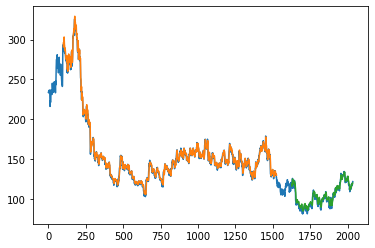

In [31]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(data_close) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()